In [37]:
import pandas as pd
x="/home/pulicherla/Downloads/twitter_additional_data.csv"
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df=pd.read_csv(x,encoding="latin1")
print(df)
print(df.columns.head())
print(df.isnull().sum().head())

                     id                                               text  \
0    805198542591717000  @OurbabyMinx @WildWhiskeyRant killed and tried...   
1    805194503892176000                            https://t.co/t1ggH7wnFk   
2    805191397666131000  Läó»immigration irrí©guliíÂre au Canada dí©cor...   
3    805189879424581000  Reminds me of Liberal Immigration Fraudster Mo...   
4    805187745207480000  #immigration #integration #canada https://t.co...   
5    805181416778543000  We want controlled immigration that contribute...   
6    805177069600731000  Is the new Manitoba immigration fee a head tax...   
7    805176811873144000  Canada immigration profit influence modernisti...   
8    805176384708575000  Canada Immigration Minister to äóìSubstantiall...   
9    805172274999554000  MíÈme les #USA=pays d'immigration par excellen...   
10   805171691315818000  @Shawhelp what changes should be made to Canad...   
11   805167260843151000  Läó»immigration irrí©guliíÂre au Canada

AttributeError: 'Index' object has no attribute 'head'

In [7]:
import pandas as pd
import re
import string

# Define a function to clean tweets
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#'
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # Remove special characters
    tweet = re.sub(r'[^A-Za-z0-9\s]', '', tweet)
    # Remove extra whitespaces
    tweet = tweet.strip()
    # Convert text to lowercase
    tweet = tweet.lower()
    return tweet

# Apply the clean_tweet function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_tweet)

# Display the first few rows of the cleaned dataset
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  @OurbabyMinx @WildWhiskeyRant killed and tried...   
1                            https://t.co/t1ggH7wnFk   
2  Läó»immigration irrí©guliíÂre au Canada dí©cor...   
3  Reminds me of Liberal Immigration Fraudster Mo...   
4  #immigration #integration #canada https://t.co...   

                                        cleaned_text  
0  killed and tried to go to canada illegally and...  
1                                                     
2  limmigration irrgulire au canada dcortique en ...  
3  reminds me of liberal immigration fraudster mo...  
4                     immigration integration canada  


                                                text Sentiment
0  @OurbabyMinx @WildWhiskeyRant killed and tried...  Negative
1                            https://t.co/t1ggH7wnFk   Neutral
2  Läó»immigration irrí©guliíÂre au Canada dí©cor...   Neutral
3  Reminds me of Liberal Immigration Fraudster Mo...   Neutral
4  #immigration #integration #canada https://t.co...   Neutral


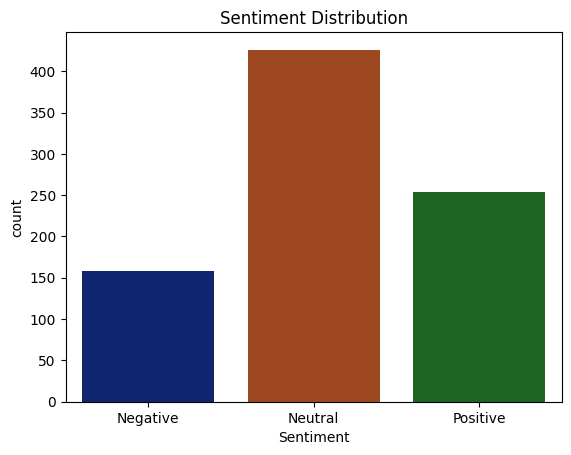

In [35]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
# Function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment'] = df['text'].apply(classify_sentiment)

# Display the first few rows with sentiment
print(df[['text', 'Sentiment']].head())

# Plot the distribution of sentiments
sns.countplot(x="Sentiment",data=df,palette="dark",hue="Sentiment")
plt.title('Sentiment Distribution')
plt.show()